# hddm_model_estimate_check: model5

In [1]:
import hddm
import pandas as pd
import numpy as np
import statsmodels.api as sm
import os,sys
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
from scipy import stats
import matplotlib as mpl
import seaborn as sns
#print 'HDDM version:',hddm.__version__

In [2]:
data=hddm.load_csv('filtered_summary240104.csv')
data=data.rename(columns={'sub_nr':'subj_idx','RT':'rt'})
data['response']=1-data.accuracy
data['ses_ddm']=4-data.ses

data

,Unnamed: 0,questions,money0,money1,index,onset,correct_ans.0left.,mouse.clicked_name,ready_begin,ready_end,...,AUC,xpos_flips,ypos_flips,xpos_reversals,ypos_reversals,RT.1,initiation_time,idle_time,response,ses_ddm
0,1,达尔文进化论的代表著作是,3,8,11,0.000006,1,rect_1,4.675418,6.271038,...,0.287324,2,3,0,1,2.496763,0.499353,1.597929,0,3
1,2,人类基因组包含,4,9,9,NaN,0,rect_1,13.951722,14.683459,...,0.230545,3,1,1,1,2.085462,0.417092,1.147004,1,3
2,3,"古代钱的单位""贯""是多少?",3,9,5,NaN,1,rect_1,22.232050,23.233077,...,-0.003662,1,1,1,1,0.918632,0.284776,0.468502,0,3
3,4,企鹅一般在几月份产卵？,2,6,13,NaN,1,rect_1,29.298100,30.165372,...,0.056144,0,1,0,1,0.785445,0.267051,0.314178,0,3
4,5,鲁迅对泰戈尔拜什么态度,1,6,17,NaN,1,rect_1,36.347310,36.997897,...,0.025147,3,1,0,1,1.323305,0.344059,0.357292,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6238,6296,人类基因组计划于()年开始实施,1,5,170,NaN,0,rect_0,1984.016425,1987.923254,...,0.052394,2,1,1,0,0.948739,0.018975,0.388983,0,1
6239,6297,达尔文进化论的代表著作是,1,9,171,NaN,1,rect_1,1993.972791,1996.217809,...,0.027813,2,1,2,1,1.715545,0.017155,1.115104,0,1
6240,6298,木星赤道的自转周期为,2,6,167,NaN,1,rect_0,2003.130806,2004.528047,...,0.047737,2,0,0,0,1.784509,0.321212,1.124241,1,1
6241,6299,彩虹的顶部是什么颜色的？,3,9,160,NaN,0,rect_1,2011.458623,2015.930851,...,0.022527,0,0,0,0,1.034638,0.434548,0.444894,1,1


In [3]:
###drop RT that are too fast###

rt_thresh_lb = 0.300 #300 ms lower threshold
rt_thresh_ub = 4
group_data = data[data['rt'] > rt_thresh_lb]
group_data = group_data[group_data['rt'] < rt_thresh_ub]

In [4]:
#Create result directory
reg_model_num = 5
date_var = 'DDM_result' 
if os.path.isdir(date_var) == False:
    os.mkdir(date_var)    


    
group_analysis_dir = os.path.join(date_var,'Group')
if os.path.isdir(group_analysis_dir) == False:
    os.mkdir(group_analysis_dir)

group_reg1_analysis_dir = os.path.join(group_analysis_dir,'GroupReg'+str(reg_model_num))
if os.path.isdir(group_reg1_analysis_dir) == False:
    os.mkdir(group_reg1_analysis_dir)
group_reg1_posterior_analysis_dir = os.path.join(group_reg1_analysis_dir,'Posteriors')
if os.path.isdir(group_reg1_posterior_analysis_dir) == False:
    os.mkdir(group_reg1_posterior_analysis_dir)
 

In [5]:
len(pd.unique(data.subj_idx))

35

# Estimate model

No model attribute --> setting up standard HDDM
Set model to ddm


/opt/conda/lib/python3.8/site-packages/hddm/models/base.py:1307: UserWarning:  
 Your include statement misses either the v, a or t parameters. 
Parameters not explicitly included will be set to the defaults, 
which you can find in the model_config dictionary!
  warnings.warn(


 [-----------------100%-----------------] 11001 of 11000 complete in 18652.0 sechddm sampling elpased time:  18652.862 s
Plotting v_Intercept
Plotting v_Intercept_std
Plotting v_history_diff
Plotting v_history_diff_std
Plotting v_ses
Plotting v_ses_std
Plotting v_history_diff:ses


OSError: [Errno 22] Invalid argument: 'DDM_result/Group/GroupReg5/Posteriors/v_history_diff:ses.png'

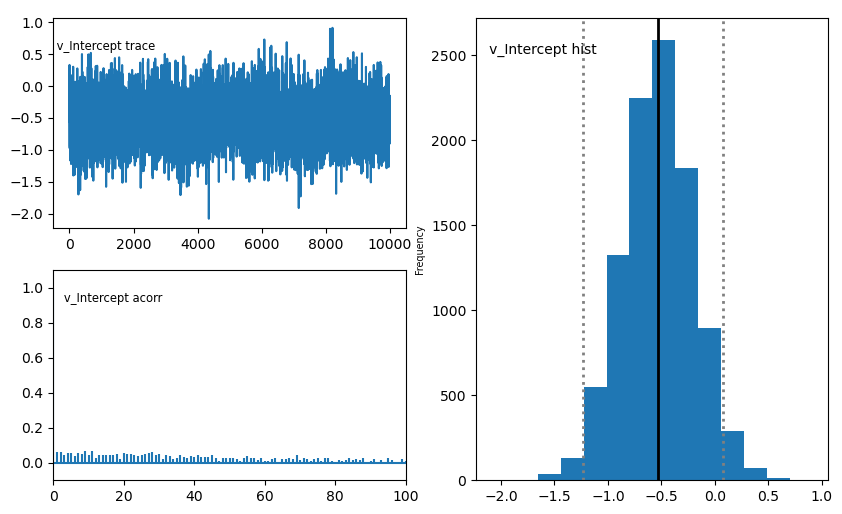

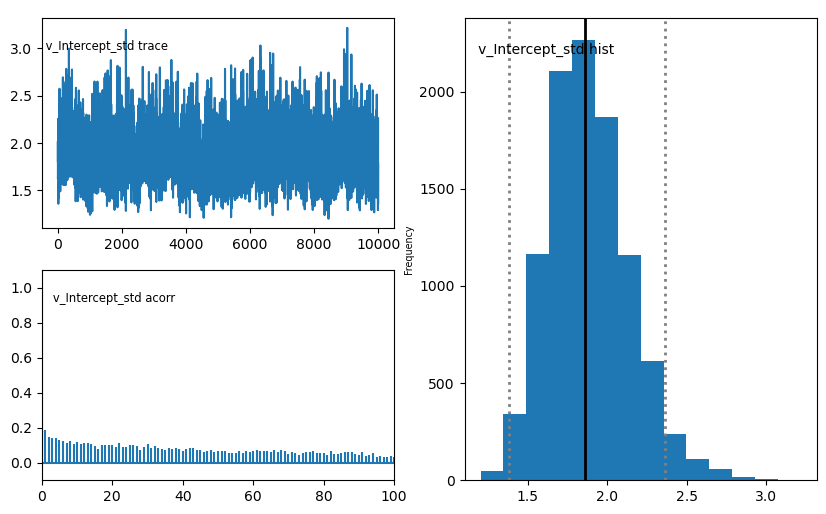

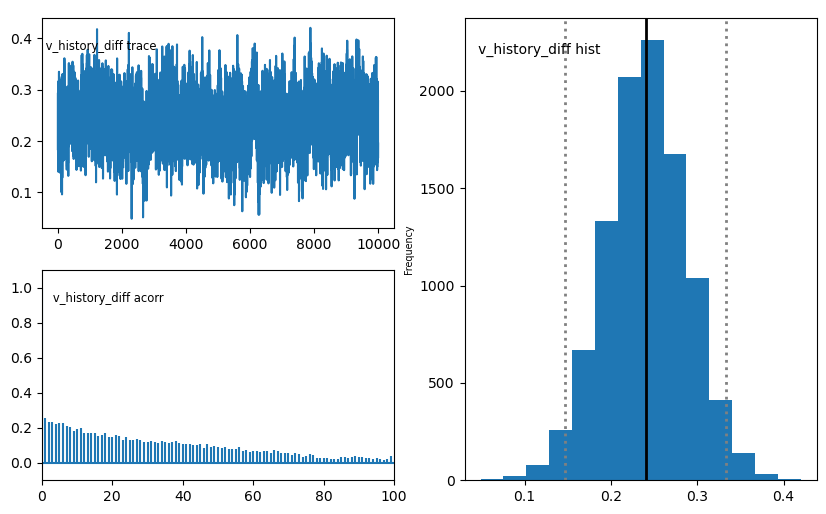

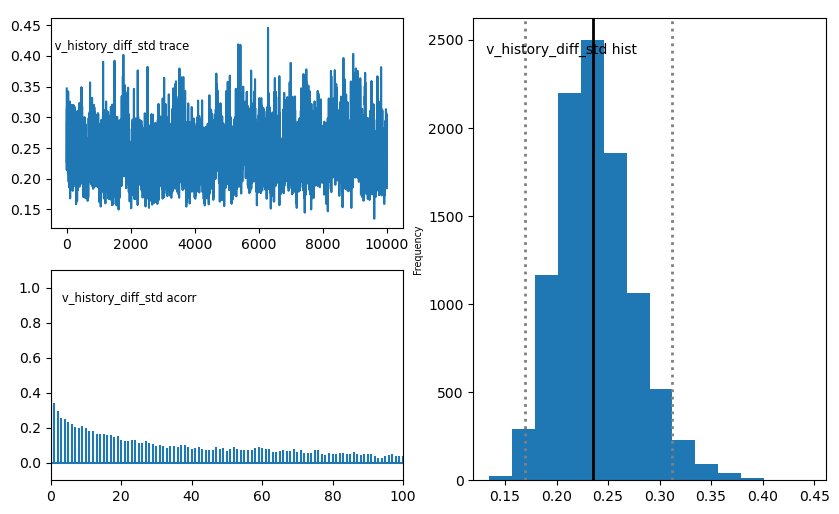

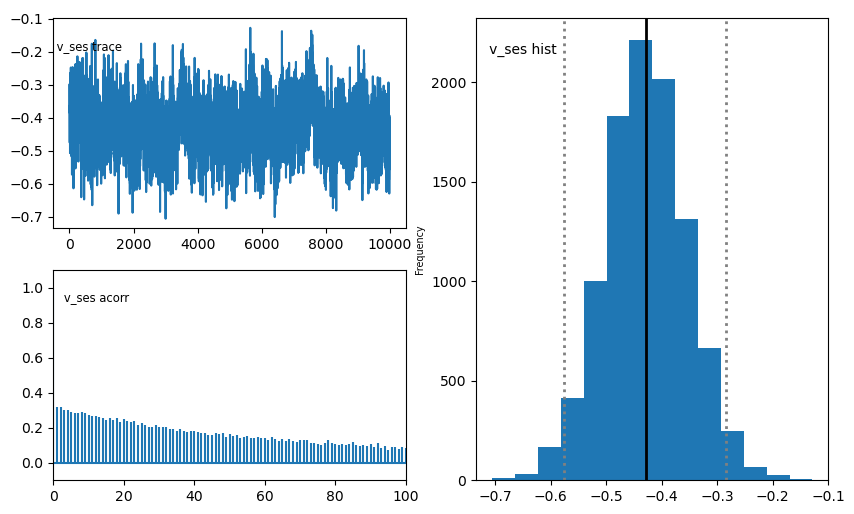

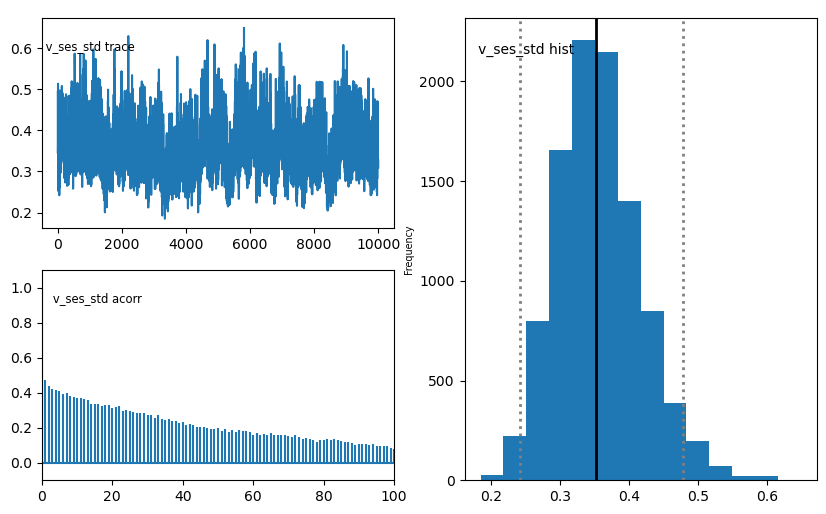

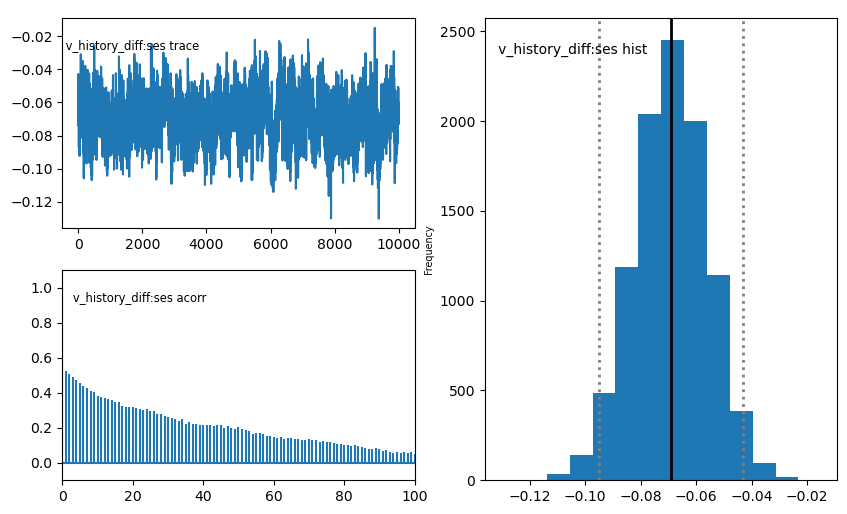

In [6]:

# model1
num_samples = 11000
num_burn = 1000
num_subs = 35

v_reg = 'v ~  1 + history_diff*ses + reward_diff*ses'
a_reg = 'a ~ 1  + ses'
z_reg = 'z ~ 1 + ses'
reg = [v_reg, a_reg, z_reg]
model_group_reg1 = hddm.HDDMRegressor(data,reg,include=['v','a','z'],group_only_regressors=False,informative=False)
model_group_reg1_traces = os.path.join(group_reg1_analysis_dir,'traces_reg'+str(reg_model_num)+'.db')

model_group_reg1.sample(num_samples,burn=num_burn,dbname=model_group_reg1_traces,db='pickle')

#print#

model_group_reg1_name = 'stats_print_all_model_group_n' + str(num_subs) + '_reg' + str(reg_model_num) + '.csv'
model_group_reg1_out_path = os.path.join(group_reg1_analysis_dir,model_group_reg1_name)
model_group_reg1.print_stats(fname=model_group_reg1_out_path)
#stats#
model_group_reg1_stats = model_group_reg1.gen_stats()
model_group_reg1_stats_name = 'stats_all_group_n' + str(num_subs) + '_reg' + str(reg_model_num) + '_stats.csv'
model_group_reg1_stats_out_path = os.path.join(group_reg1_analysis_dir,model_group_reg1_stats_name)
model_group_reg1_stats.to_csv(model_group_reg1_stats_out_path)
dic_reg1 = model_group_reg1.dic

#save reg1
model_group_reg1_sname = 'model_group_reg' + str(reg_model_num) + '_n' + str(num_subs)
model_group_reg1_path = os.path.join(group_reg1_analysis_dir,model_group_reg1_sname)
model_group_reg1.save(model_group_reg1_path)

##save posterior plots for reg1##
model_group_reg1.plot_posteriors(save=True,path=group_reg1_posterior_analysis_dir)
plt.close('all')



In [7]:
model_group_reg1.dic

14502.56745002062

# Post-predictive check

In [8]:
ppc_data = hddm.utils.post_pred_gen(model_group_reg1)
ppc_compare = hddm.utils.post_pred_stats(data, ppc_data)
ppc_compare

Start generating posterior prediction...


/opt/conda/lib/python3.8/site-packages/kabuki/analyze.py:345: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sampled_stats[name][i] = value
/opt/conda/lib/python3.8/site-packages/kabuki/analyze.py:345: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sampled_stats[name][i] = value
/opt/conda/lib/python3.8/site-packages/kabuki/analyze.py:345: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sampled_stats[name][i] = value
/opt/conda/lib/python3

,observed,mean,std,SEM,MSE,credible,quantile,mahalanobis
stat,,,,,,,,
accuracy,0.337818,0.302305,0.247660,0.001261,0.062597,True,46.885714,0.143394
mean_ub,1.617435,2.245013,0.657016,0.393854,0.825524,True,14.935439,0.955194
std_ub,0.583858,2.033335,0.787162,2.100983,2.720607,False,2.080763,1.841396
10q_ub,1.028101,0.691415,0.220629,0.113357,0.162034,True,91.002550,1.526029
30q_ub,1.244591,1.112640,0.303509,0.017411,0.109528,True,71.132494,0.434752
50q_ub,1.477723,1.614364,0.459189,0.018671,0.229525,True,43.753598,0.297571
70q_ub,1.798163,2.410129,0.758268,0.374502,0.949473,True,20.824081,0.807057
90q_ub,2.408426,4.410397,1.582307,4.007888,6.511582,True,9.564931,1.265223
mean_lb,-1.543985,-1.964126,0.571997,0.176519,0.503700,True,76.074286,0.734516


# Test of convergence

In [9]:

from kabuki.analyze import gelman_rubin

num_samples = 11000
num_burn = 1000
num_subs = 35
reg_model_num = 2

v_reg = 'v ~  1 + history_diff*ses + reward_diff*ses'
a_reg = 'a ~ 1  + ses'
z_reg = 'z ~ 1 + ses'
reg = [v_reg, a_reg, z_reg]

models = []
for i in range(5):
    m = hddm.HDDMRegressor(data,reg,group_only_regressors=False,include=['v','a','z'],informative=False)
    m.find_starting_values()
    m.sample(15000, burn=5000)
    models.append(m)

gelman_rubin(models)

No model attribute --> setting up standard HDDM
Set model to ddm


/opt/conda/lib/python3.8/site-packages/scipy/optimize/_optimize.py:2309: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


 [-----------------100%-----------------] 15001 of 15000 complete in 24200.8 sechddm sampling elpased time:  24201.381 s
No model attribute --> setting up standard HDDM
Set model to ddm


/opt/conda/lib/python3.8/site-packages/scipy/optimize/_optimize.py:2309: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


 [-----------------100%-----------------] 15001 of 15000 complete in 24216.2 sechddm sampling elpased time:  24216.77 s
No model attribute --> setting up standard HDDM
Set model to ddm


/opt/conda/lib/python3.8/site-packages/scipy/optimize/_optimize.py:2309: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


 [-----------------100%-----------------] 15001 of 15000 complete in 24246.0 sechddm sampling elpased time:  24246.638 s
No model attribute --> setting up standard HDDM
Set model to ddm


/opt/conda/lib/python3.8/site-packages/scipy/optimize/_optimize.py:2309: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


 [-----------------100%-----------------] 15001 of 15000 complete in 24150.0 sechddm sampling elpased time:  24150.561 s
No model attribute --> setting up standard HDDM
Set model to ddm


/opt/conda/lib/python3.8/site-packages/scipy/optimize/_optimize.py:2309: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


 [-----------------100%-----------------] 15001 of 15000 complete in 25041.6 sechddm sampling elpased time:  25042.208 s


{'v_Intercept': 1.0023452944205493,
 'v_Intercept_std': 1.0102008693645859,
 'v_Intercept_subj.104': 1.0071683464517374,
 'v_Intercept_subj.105': 1.004570635627576,
 'v_Intercept_subj.106': 1.0492761801439126,
 'v_Intercept_subj.107': 1.0370990895209333,
 'v_Intercept_subj.108': 1.0173259140339255,
 'v_Intercept_subj.109': 1.0156698940793196,
 'v_Intercept_subj.110': 1.0041848814055565,
 'v_Intercept_subj.111': 1.0015936669108478,
 'v_Intercept_subj.112': 1.003512496321455,
 'v_Intercept_subj.113': 1.0112126022413526,
 'v_Intercept_subj.114': 1.0010687972392391,
 'v_Intercept_subj.115': 1.003593021439195,
 'v_Intercept_subj.117': 1.0041904238869543,
 'v_Intercept_subj.118': 1.004812346270117,
 'v_Intercept_subj.119': 1.0175105094966763,
 'v_Intercept_subj.120': 1.005995279252019,
 'v_Intercept_subj.121': 1.006190637736849,
 'v_Intercept_subj.122': 1.0111241330974277,
 'v_Intercept_subj.123': 1.026319722539122,
 'v_Intercept_subj.124': 1.0059356167393618,
 'v_Intercept_subj.125': 1.0461

In [ ]:
pd.DataFrame(gelman_rubin(models),index=[0]).T.to_csv(group_reg1_analysis_dir+'/coverg'+str(reg_model_num) + '.csv')